# Student Performance

Kris Barbier

## Imports

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Mute warnings
import warnings
warnings.filterwarnings('ignore')

## Custom Functions

In [3]:
#Univariate plots for EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [4]:
#Multivariate plots for EDA
def plot_categorical_vs_target(df, x, y='total score',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='total score',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Load and Inspect Data

In [5]:
#Read in csv
df = pd.read_csv('Data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#Preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#Check shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 1000 rows and 8 columns.


In [8]:
#Check summary stats
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#Check stats of object columns
df.describe(exclude = 'number')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [10]:
#Examine value counts of race/ethnicity
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [11]:
#Examine value counts of parent education
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [12]:
#Create a target column of total scores
df['total score'] = df['math score'] + df['writing score'] + df['reading score']

#Verify the change
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


## EDA of columns

### Gender

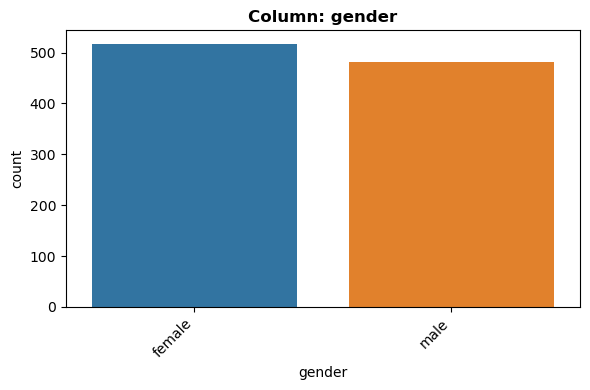

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'female' occurs 518 times (51.8%)
- Not constant or quasi-constant.


In [13]:
#Call function
explore_categorical(df, x = 'gender');

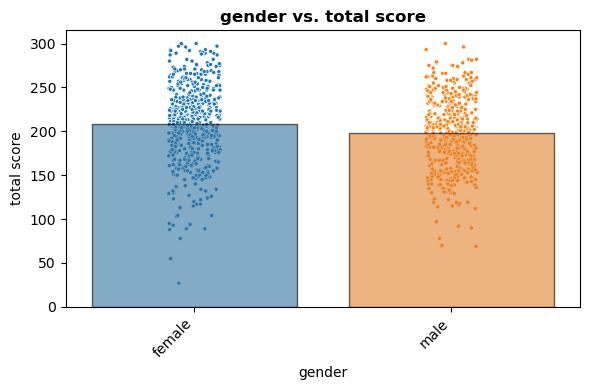

In [14]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'gender');

- Females not only make up more the students in this dataset (51.8% female), but they also tend to have higher average total scores than males.

### Race/Ethnicity

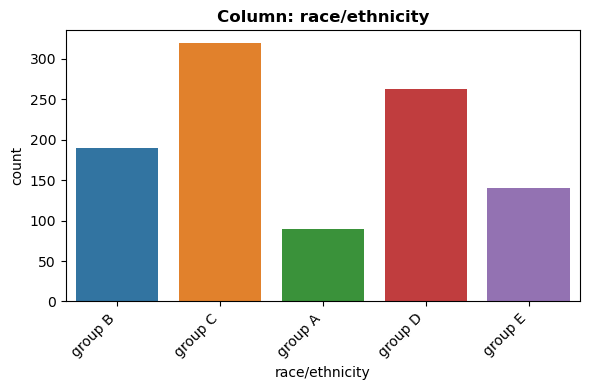

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'group C' occurs 319 times (31.9%)
- Not constant or quasi-constant.


In [15]:
#Call function
explore_categorical(df, x = 'race/ethnicity');

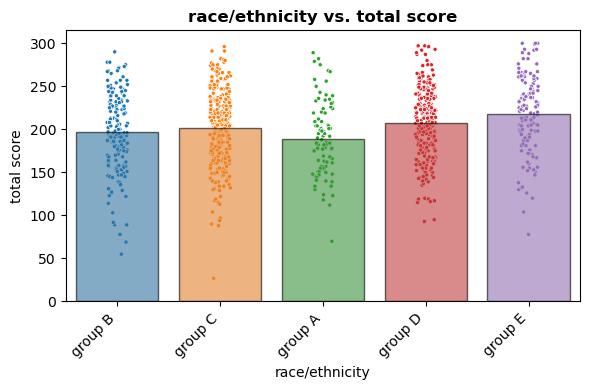

In [16]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'race/ethnicity');

- While these categories do not tell us much about a student's race/ethnicity, it is interesting to see the differences between the groups. The spread of scores for all 5 is similar, but Group A has the lowest average total score, and Group E has the highest.

### Parental Level of Education

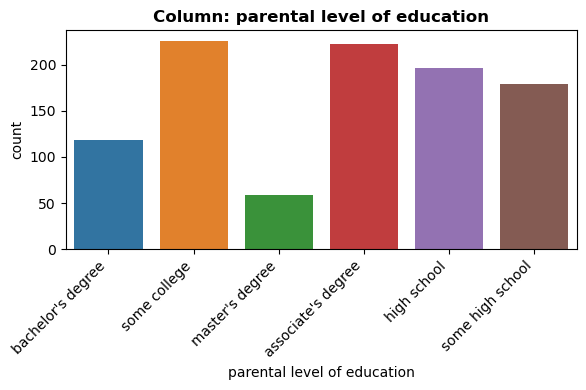

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'some college' occurs 226 times (22.6%)
- Not constant or quasi-constant.


In [17]:
#Call function
explore_categorical(df, x = 'parental level of education');

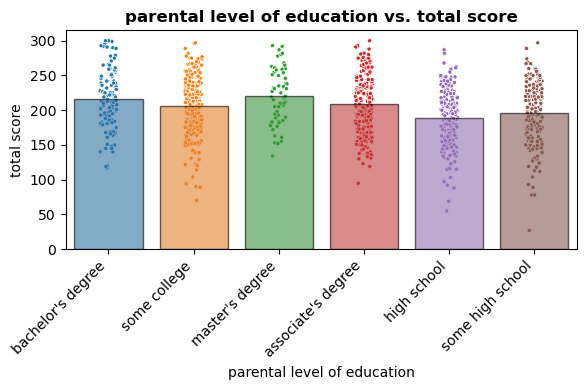

In [18]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'parental level of education');

- The spread of scores is less for parents with higher educational levels, which is an interesting trend to see. Overall, the average scores are not as different as I might have expected, but students whose parents have master's degrees seem to have the highest average total scores.

### Lunch


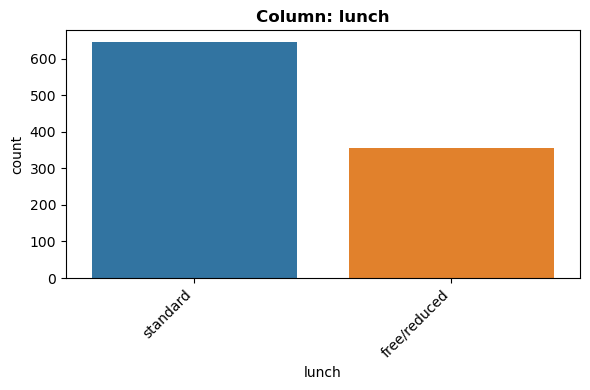

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'standard' occurs 645 times (64.5%)
- Not constant or quasi-constant.


In [19]:
#Call function
explore_categorical(df, x = 'lunch');

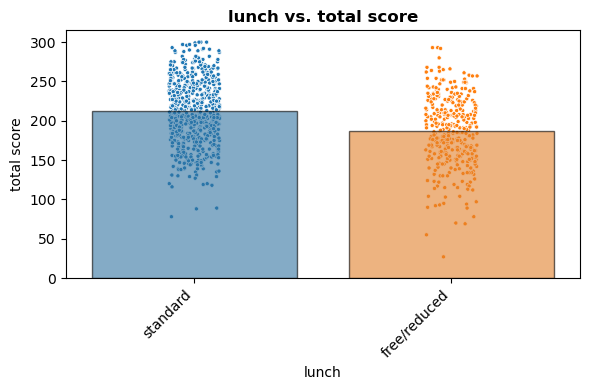

In [20]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'lunch');

- The majority of students are on standard lunch, and these students have tend to have higher average total scores than students on free and reduced lunch.

### Test Preparation Course

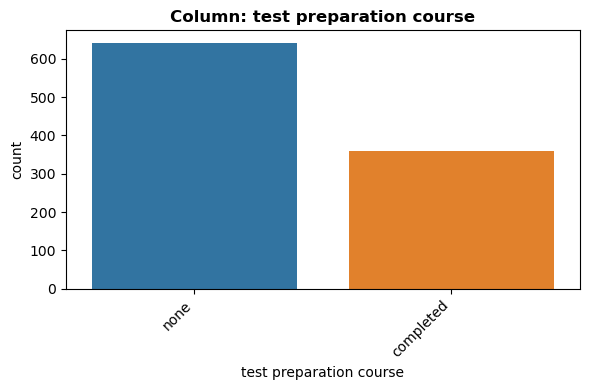

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'none' occurs 642 times (64.2%)
- Not constant or quasi-constant.


In [21]:
#Call function
explore_categorical(df, x = 'test preparation course');

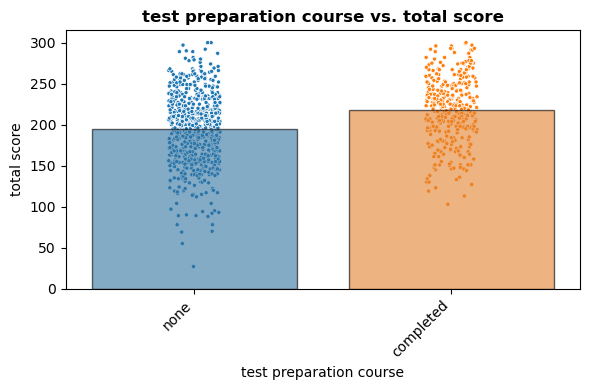

In [22]:
#Call multivariate function
plot_categorical_vs_target(df, x = 'test preparation course');

- Unsurprisingly, students who completed the test preparation course have higher average total scores than students who do not. The majority of students, however, did not complete the preparation course.

### Math Score

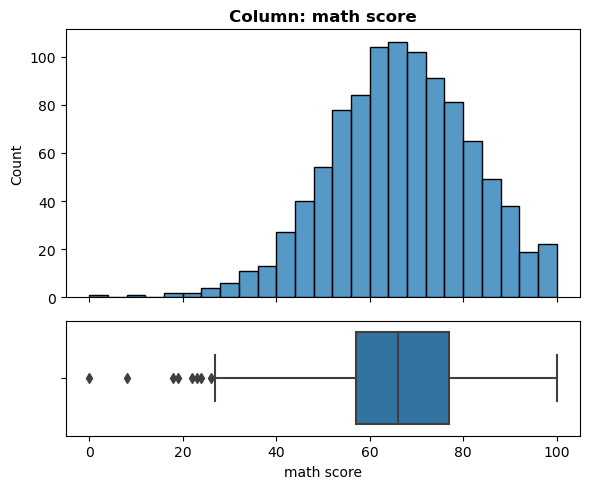

- NaN's Found: 0 (0.0%)
- Unique Values: 81
- Most common value: '65' occurs 36 times (3.6%)
- Not constant or quasi-constant.


In [23]:
#Call function
explore_numeric(df, x = 'math score');

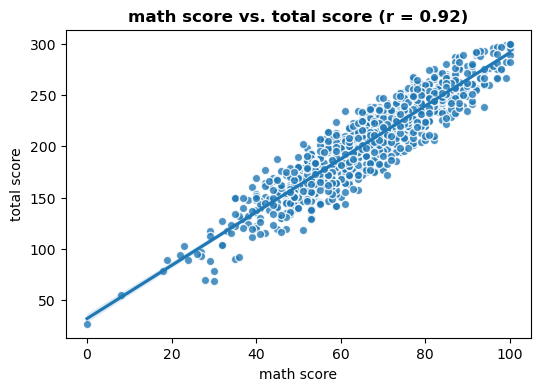

In [24]:
#Call multivariate function
plot_numeric_vs_target(df, x = 'math score');

- The distribution of math scores shows some outlying values on the low end, and a very high correlation score of .92.

### Reading Score

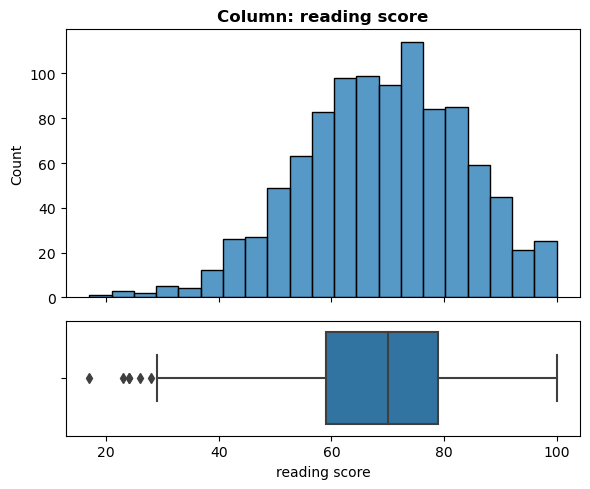

- NaN's Found: 0 (0.0%)
- Unique Values: 72
- Most common value: '72' occurs 34 times (3.4%)
- Not constant or quasi-constant.


In [25]:
#Call function
explore_numeric(df, x = 'reading score');

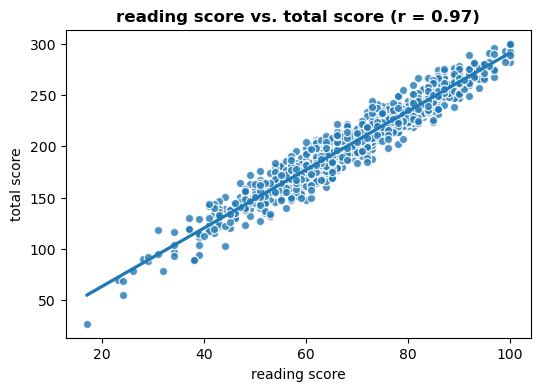

In [26]:
#Call multivariate function
plot_numeric_vs_target(df, x = 'reading score');

- A student's reading score has an even higher correlation to the target, of .97. Similar to the math scores, there are some outliers on the low end of the distribution.

### Writing Score

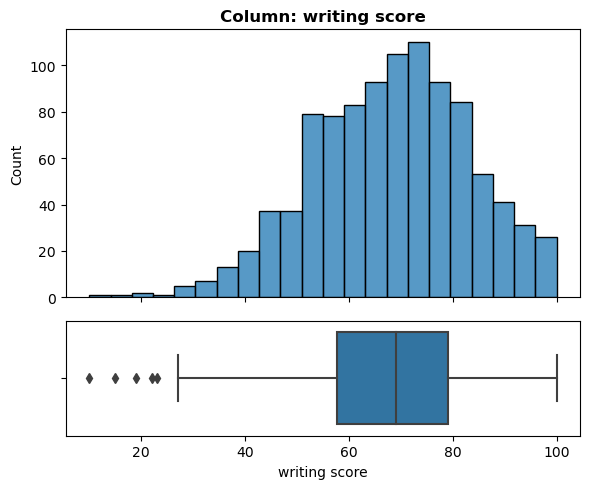

- NaN's Found: 0 (0.0%)
- Unique Values: 77
- Most common value: '74' occurs 35 times (3.5%)
- Not constant or quasi-constant.


In [27]:
#Call function
explore_numeric(df, x = 'writing score');

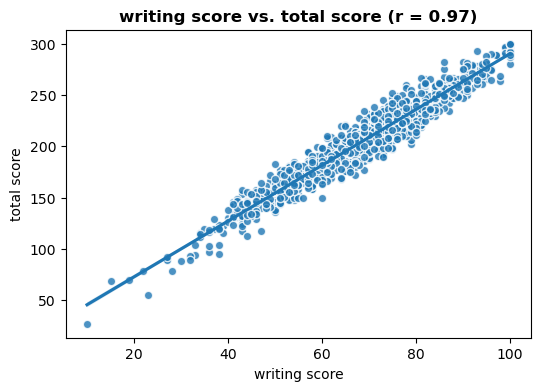

In [28]:
#Call multivariate function
plot_numeric_vs_target(df, x = 'writing score');

- Writing scores also have a higher correlation to the target, and some low end outliers, same as reading scores.

### Total Score (Target)

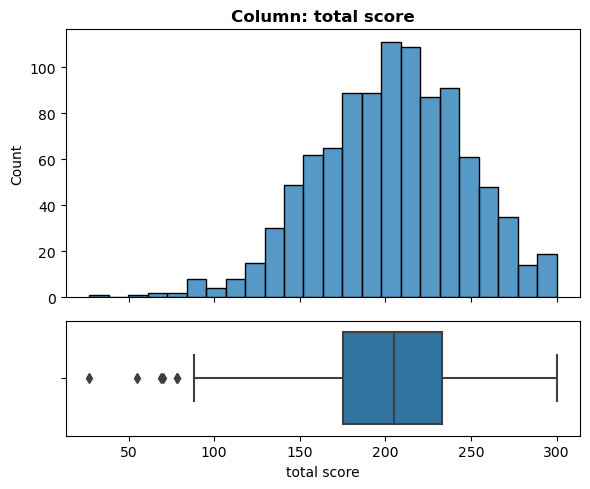

- NaN's Found: 0 (0.0%)
- Unique Values: 194
- Most common value: '204' occurs 15 times (1.5%)
- Not constant or quasi-constant.


In [29]:
#Call function
explore_numeric(df, x = 'total score');

- The distribution of total scores is very similar to the individual subjects, which is unsurprising.

### Correlation Heat Map

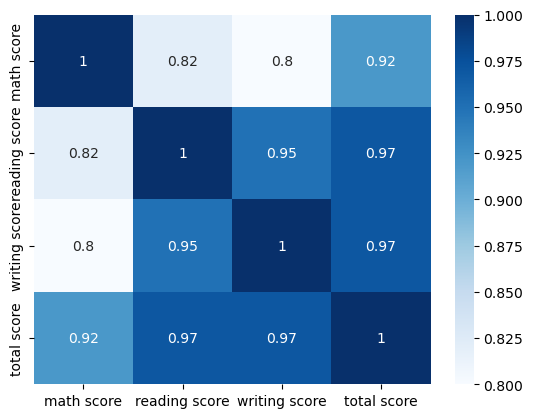

In [30]:
#Create a correlation heat map
corr = df.corr(numeric_only = True).round(2)
sns.heatmap(corr, cmap = 'Blues', annot = True);

- All of the numeric features of this data set are highly correlated. This means that students who do well in one subject area will also likely do well in the others, and vice versa.

## Other Explanatory Visuals

- Here, I will further explore the test preparation course feature, combined with other categorical features as well. From the earlier EDA, this variable seems like it may be most likely to impact student's test scores.

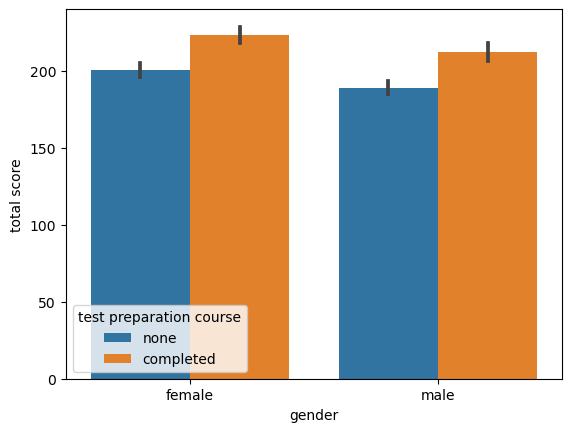

In [42]:
#Test preparation course and gender
sns.barplot(df, x = 'gender', y = 'total score', hue = 'test preparation course');

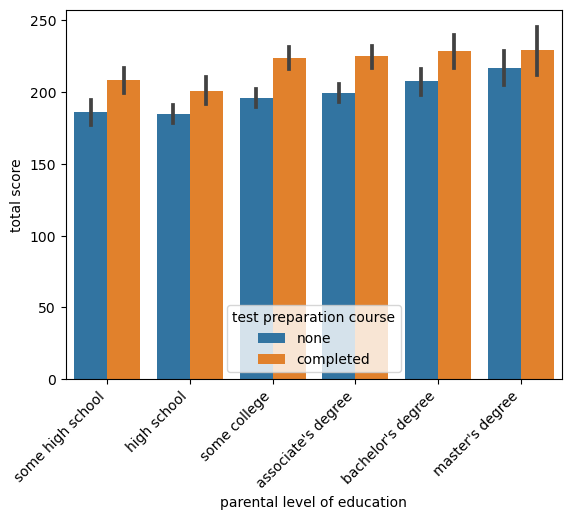

In [32]:
#Test preparation course and parental level of education
#Set order of education levels
education_order = ['some high school',
                   'high school',
                   'some college',
                   "associate's degree",
                   "bachelor's degree",
                   "master's degree"]

#Barplot
fig, ax = plt.subplots()
sns.barplot(df, x = 'parental level of education', y = 'total score', 
            hue = 'test preparation course', order = education_order);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

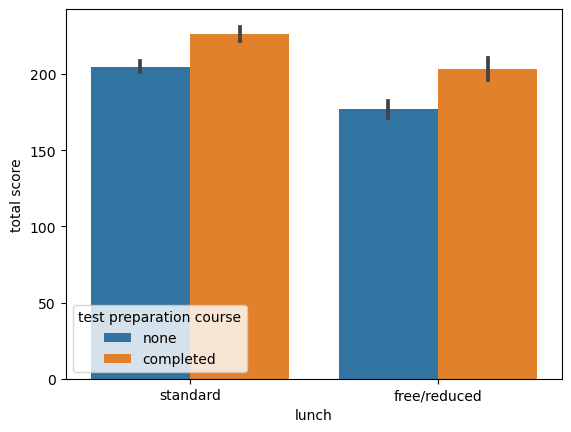

In [43]:
#Test preparation course and lunch
sns.barplot(df, x = 'lunch', y = 'total score', hue = 'test preparation course');

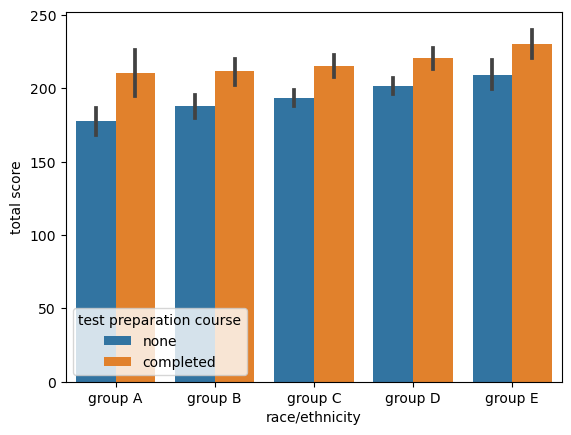

In [34]:
#Test preparation and race/ethnicity
#Set order
ethnicity_order = ['group A','group B', 'group C', 'group D', 'group E']

#Barplot
sns.barplot(df, x = 'race/ethnicity', y = 'total score', 
            hue = 'test preparation course', order = ethnicity_order);

- When comparing all categorical variable with test preparation course, in every case, students who completed the course outperformed their peers who did not complete the course. When looking at how to increase student performance on this assessment, one consideration may be to have more students complete the preparation course prior to testing.

## Unsupervised Machine Learning: K-Means Clustering

- Next, I will use K-Means clustering to group students together based on similar qualities.

In [35]:
#New Imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

#Set sklearn output to pandas
from sklearn import set_config
set_config(transform_output = 'pandas')

In [36]:
#Preprocess data for clustering
#Save lists of columns
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns

#Instantiate transformers
ohe = OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')
scaler = StandardScaler()

#Instantiate pipelines
cat_pipe = make_pipeline(ohe)
num_pipe = make_pipeline(scaler)

#Create tuples
cat_tuple = ('Categorical', cat_pipe, cat_cols)
num_tuple = ('Numeric', num_pipe, num_cols)

#Instantiate preprocessor
preprocessor = ColumnTransformer([cat_tuple, num_tuple], verbose_feature_names_out = False)

#View preprocessor
preprocessor

ColumnTransformer(transformers=[('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['math score', 'reading score', 'writing score', 'total score'], dtype='object'))],
                  verbose_feature_names_out=False)

In [37]:
#Fit and transform dataframe using preprocessor
df_tf = preprocessor.fit_transform(df)

#Verify the change
df_tf.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,...,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score,total score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.390024,0.193999,0.391492,0.343574
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.192076,1.427476,1.313269,1.021927
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.577711,1.770109,1.642475,1.747064
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744,-1.293830
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.653954,0.605158,0.457333,0.600881


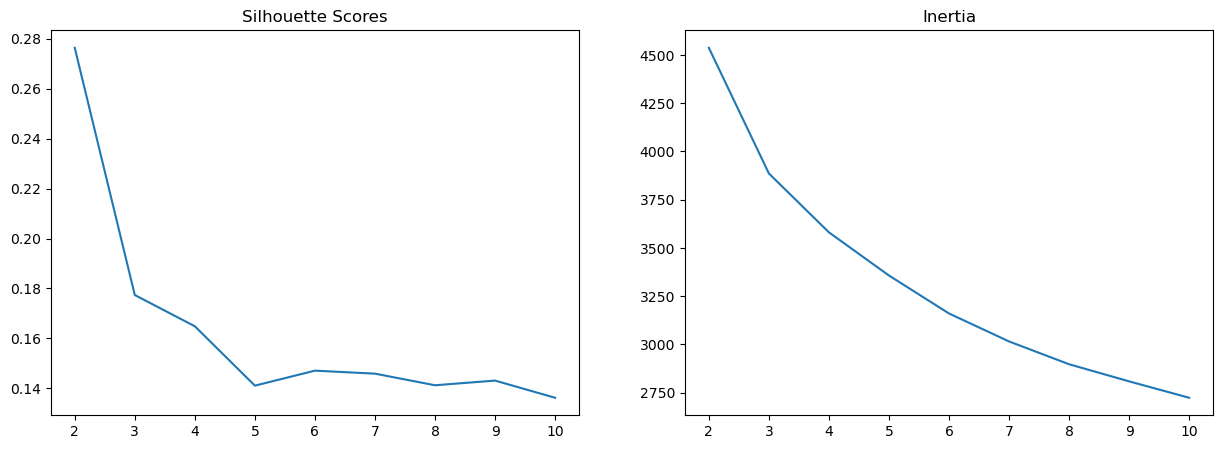

In [38]:
##Check inertia and silhouette scores
#Save range values and empty lists
ks = range(2,11)
sils = []
inertias = []

#Loop through range and append to saved lists
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_tf)
  sils.append(silhouette_score(df_tf, kmeans.labels_))
  inertias.append(kmeans.inertia_)

#Plot inertias and silhouette scores for each number of clusters
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

- Based on the silhouette scores, 2 clusters will be optimal, but there is a bend in the inertia plot around 3 clusters. I will try 3 clusters, because I think that can help to group students into their more correct groupings than only have 2.

In [39]:
#Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters= 3, random_state= 42)
kmeans.fit(df_tf)

#Add cluster labels in a new column to original df
df['cluster'] = kmeans.labels_
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,1
2,female,group B,master's degree,standard,none,90,95,93,278,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,2
4,male,group C,some college,standard,none,76,78,75,229,1


In [40]:
#Group df by clusters and aggregate with the mean
cluster_groups = df.groupby('cluster', as_index= False).mean()
cluster_groups

,cluster,math score,reading score,writing score,total score
0,0,65.459584,68.415704,67.778291,201.653580
1,1,81.389776,85.019169,84.182109,250.591054
2,2,48.307087,50.921260,48.649606,147.877953


### Analysis of Clusters

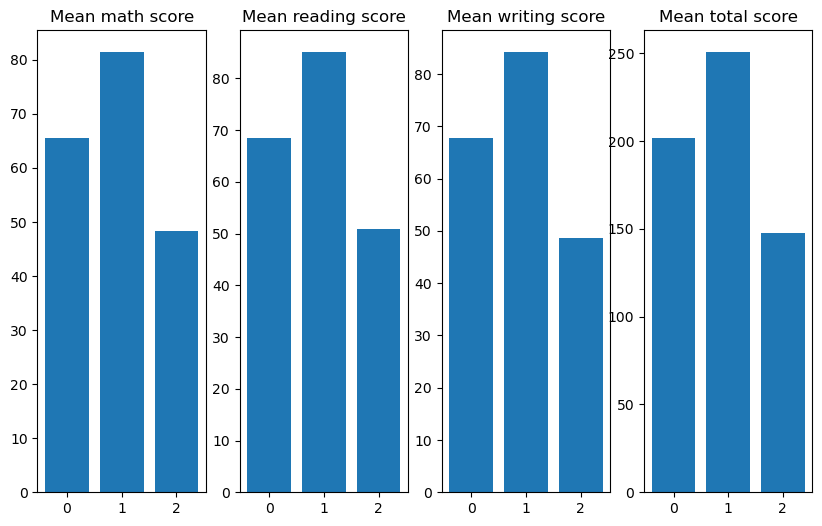

In [41]:
#Visualize grouped clusters
fig, axes = plt.subplots(1,4, figsize = (10, 6))

#Use .ravel() to return flattened array
axes = axes.ravel()

#Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

- Based on these groupings, we can see that students in group 0 had the middle range of average scores, while group 1 had the highest average scores, and group 2 had the lowest average scores. Using this information, we can help the students in group 2 by giving them targeted instructional interventions to help them improve their scores. Students in group 0 may also benefit from this, while those in group 1 could be looked at for gifted/talented identification.

## Conclusions and Next Steps:

- Based on this dataset, we can see that students who complete a test preparation course tend to do better on their assessment. If this school would like to further increase student's overall test scores, they should consider options for providing this preparation course to their students.
- From K-Means clustering, we combined students into three groups: those with high, low, and medium average scores in all subjects and cumulatively. In order to truly help the students in the low average score group, the school should provide opportunities for targeted instruction to help those students improve their test scores. Students with medium average scores could also benefit from this type of practice as well. For students in the higher score group, different types of enrichment could be given to them to help them explore academics more and grow in other skills as well.
- For next steps, I could further explore this dataset using supervised machine learning to see what features are used the most to make predictions, and to try to build a prediction model that will accurately predict total score based on the other features.